# Semester project

* Name and Matriculation number
* Name and Matriculation number

In [2]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Task 1

a)

In [3]:
# Reading in the data and displaying the first three rows
df = pd.read_csv("telecom_customer_churn.csv", index_col="Customer ID")
df.head(3)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices


b) 

In [4]:
# Displaying how many columns have missing values
missing_values_count = df.isna().sum()

columns_with_missing_values = missing_values_count[missing_values_count > 0]

num_columns_with_missing_values = len(columns_with_missing_values)
num_columns_with_missing_values

14

c)

In [5]:
# Calculating the total missing values in the data
total_missing_values = df.isna().sum().sum()
total_missing_values

26972

d)

In [6]:
# Selecting the columns
selected_columns = ['Number of Referrals', 'Tenure in Months', 'Monthly Charge', 'Total Revenue']
# Computing the summary statistics
summary_statistics = df[selected_columns].agg(['mean', 'std', 'min', 'max']).round(2)

print(summary_statistics)

      Number of Referrals  Tenure in Months  Monthly Charge  Total Revenue
mean                 1.95             32.39           63.60        3034.38
std                  3.00             24.54           31.20        2865.20
min                  0.00              1.00          -10.00          21.36
max                 11.00             72.00          118.75       11979.34


e)

In [7]:
# Calculate the total number of customers
total_customers = df.shape[0]
# Count the number of customers who are labeled as 'Churned'
churned_customers = df[df['Customer Status'] == 'Churned'].shape[0]
# Find the maximum value in the 'Total Extra Data Charges'
max_extra_data_charges = df['Total Extra Data Charges'].max()
# Calculate the standard deviation of values in the 'Total Extra Data Charges'
std_extra_data_charges = df['Total Extra Data Charges'].std()
# Print the results and those who are floats rounded to two decimals
print(f"Number of customers: {total_customers}")
print(f"Number of customers who churned: {churned_customers}")
print(f"Maximum of Total Extra Data Charges: {max_extra_data_charges:.2f}")
print(f"Standard deviation of Total Extra Data Charges: {std_extra_data_charges:.2f}")

Number of customers: 7043
Number of customers who churned: 1869
Maximum of Total Extra Data Charges: 150.00
Standard deviation of Total Extra Data Charges: 25.10


f)

In [9]:
# Calculating the fraction of married people
married_fraction = (df['Married'] == 'Yes').mean()
# Converting it into percentage
married_percentage = married_fraction * 100
print(f"Percent of married people: {married_percentage:.2f}")

Percent of married people: 48.30


g)

In [10]:
# Getting the three main reasons for Churning
top_churn_categories = df['Churn Category'].value_counts().nlargest(3)

top_churn_categories

Competitor         841
Dissatisfaction    321
Attitude           314
Name: Churn Category, dtype: int64

h)

i)

In [13]:
# Create a new target feature 'Churn Yes'
df['Churn Yes'] = (df['Customer Status'] == 'Churned').astype(int)

## Task 2

a)

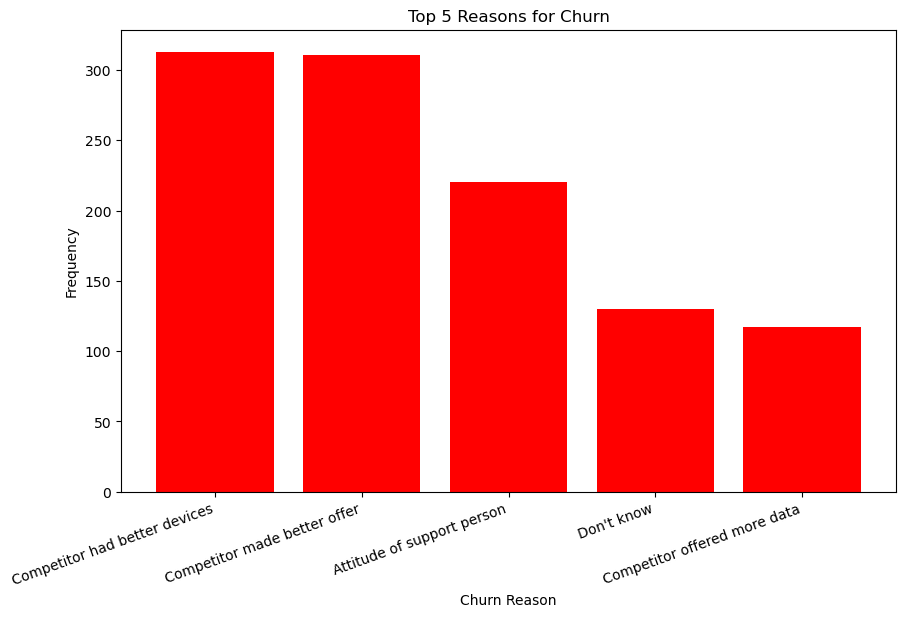

In [11]:
# Get the five frequent reasons for Churning
top_churn_reasons = df['Churn Reason'].value_counts().nlargest(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_churn_reasons.index, top_churn_reasons.values, color='red')
plt.title('Top 5 Reasons for Churn')
plt.xlabel('Churn Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=20, ha='right')
plt.show()

b)

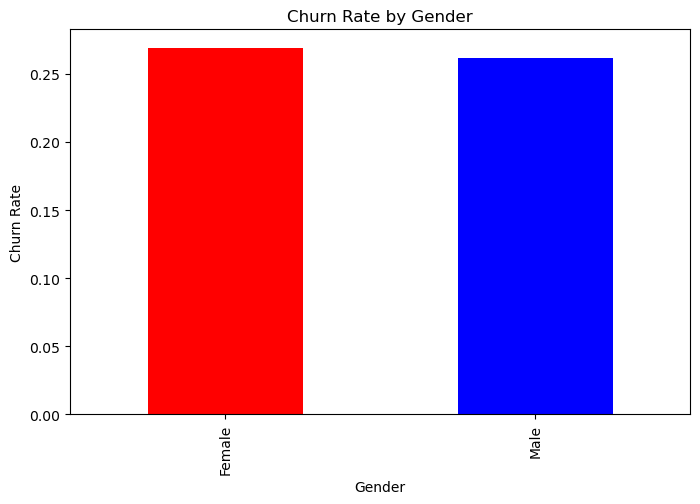

In [14]:
# Calculate the churn rate by gender
churn_rate_by_gender = df.groupby('Gender')['Churn Yes'].mean()
# Create a new figure for the plot and plot the variable that was calculated above
plt.figure(figsize=(8, 5))
churn_rate_by_gender.plot(kind='bar', color=['red', 'blue'])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

c)

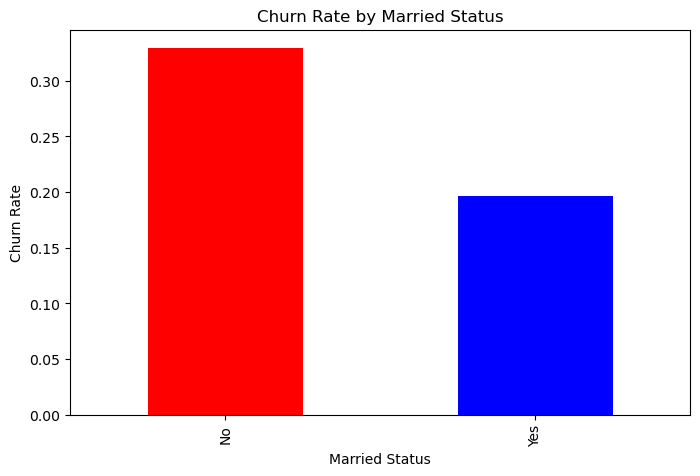

In [15]:
# Calculate the churn rate by married or not married people
churn_rate_by_married = df.groupby('Married')['Churn Yes'].mean()
# Create a new figure for the plot and plot the variable that was calculated above
plt.figure(figsize=(8, 5))
churn_rate_by_married.plot(kind='bar', color=['red', 'blue'])
plt.title('Churn Rate by Married Status')
plt.xlabel('Married Status')
plt.ylabel('Churn Rate')
plt.show()

d)

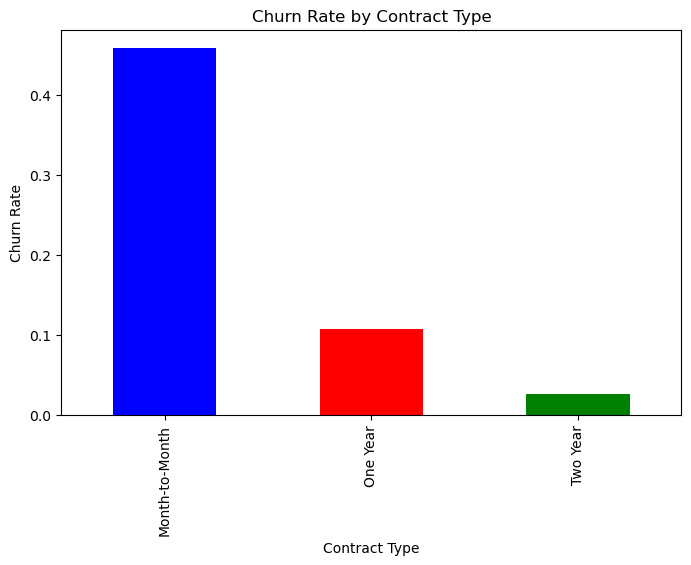

In [16]:
# Calculate the churn rate by contract option
churn_rate_by_contract = df.groupby('Contract')['Churn Yes'].mean()
# Create a new figure for the plot and plot the variable that was calculated above
plt.figure(figsize=(8, 5))
churn_rate_by_contract.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

e)

C:\Users\teodo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


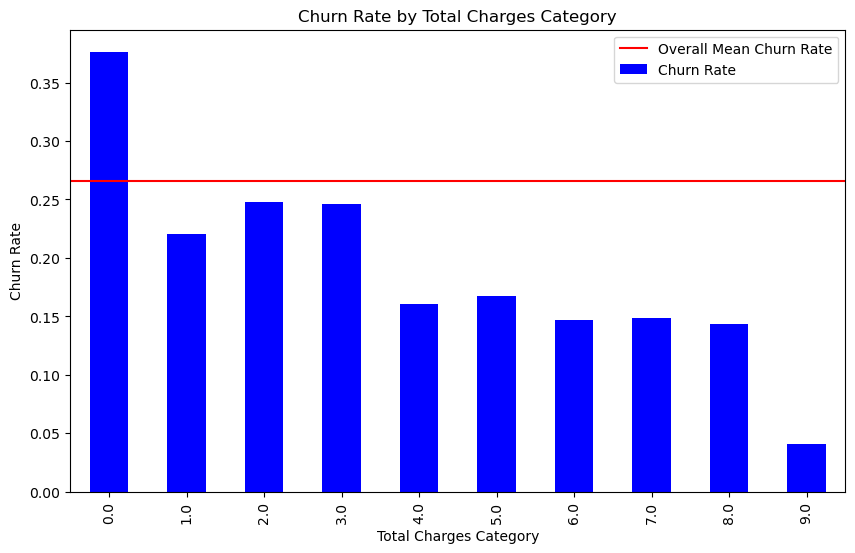

In [17]:
# Initialize a KBinsDiscretizer object
kbins_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
# Discretize the 'Total Charges' column into categories and assign the result to a new column 'Total Charges Category'
df['Total Charges Category'] = kbins_discretizer.fit_transform(df[['Total Charges']])
# Calculate the mean churn rate for each category
churn_rate_by_total_charges = df.groupby('Total Charges Category')['Churn Yes'].mean()
# Calculate the overall mean churn rate for the entire dataset
overall_mean_churn_rate = df['Churn Yes'].mean()
# Create a new figure and plot the new findings
plt.figure(figsize=(10, 6))
churn_rate_by_total_charges.plot(kind='bar', color='blue', label='Churn Rate')
plt.axhline(y=overall_mean_churn_rate, color='red', label='Overall Mean Churn Rate')
plt.title('Churn Rate by Total Charges Category')
plt.xlabel('Total Charges Category')
plt.ylabel('Churn Rate')
plt.legend()
plt.show()

f)

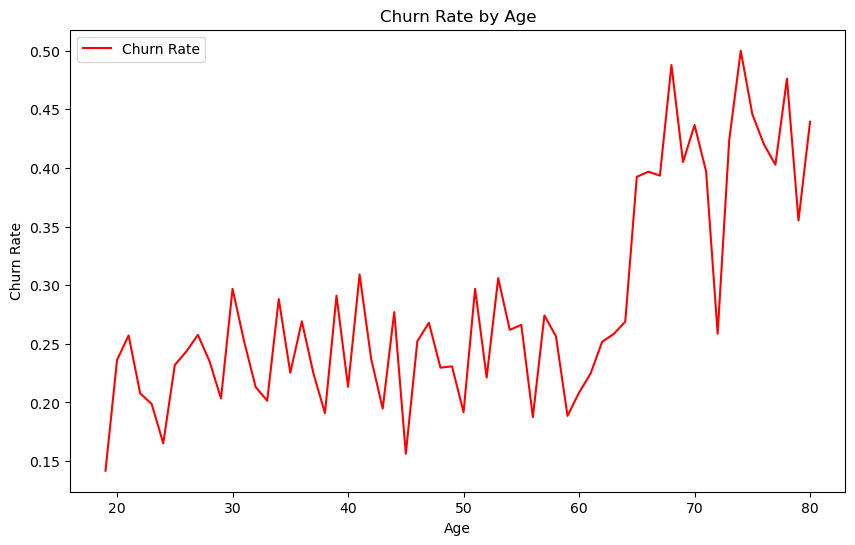

In [18]:
# Calculate the churn rate by Age
churn_rate_by_age = df.groupby('Age')['Churn Yes'].mean()
# Create a nile plot which will display the variable from above in a line plot
plt.figure(figsize=(10, 6))
plt.plot(churn_rate_by_age.index, churn_rate_by_age.values, color='red', linestyle='-', label='Churn Rate')
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.legend()
plt.show()

## Task 3

a)

In [19]:
df_churn = df[df['Customer Status'] == 'Churned'].copy()
df_churn.shape

(1869, 39)

b)

In [20]:
# List of features to be dropped
features_to_drop = ['Customer Status', 'Churn Yes', 'City', 'Zip Code', 'Churn Category', 'Churn Reason', 'Total Charges Category']
df_churn = df_churn.drop(columns=features_to_drop)
# Drop columns with missing values
df_churn = df_churn.dropna(axis=1)

c)

In [21]:
# Select numerical features
df_numerical_features = df_churn.select_dtypes(include='number')
# Select categorical features
df_categorical_features = df_churn.select_dtypes(include='object')
# Initialize a OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
# Encode categorical features using OneHotEncoder
categorical_encoded = encoder.fit_transform(df_categorical_features)

# Create a DataFrame with the transformed categorical features
df_kmeans = pd.DataFrame(data=categorical_encoded, columns=encoder.get_feature_names_out(df_categorical_features.columns))

# Set the index of df_kmeans to match the index of df_churn
df_kmeans.index = df_churn.index

# Add the numerical features to df_kmeans
df_kmeans[df_numerical_features.columns] = df_numerical_features

d)

In [24]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
df_kmeans_scaled = scaler.fit_transform(df_kmeans)

# Convert the standardized array back to a DataFrame
df_kmeans_scaled = pd.DataFrame(df_kmeans_scaled, columns=df_kmeans.columns)

e)

In [25]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, n_init=5, random_state=123456)

# Fit the model to the standardized data
df_kmeans_scaled['Cluster'] = kmeans.fit_predict(df_kmeans_scaled)

# Count the number of customers in each cluster
cluster_counts = df_kmeans_scaled['Cluster'].value_counts()
cluster_counts

1    1424
0     445
Name: Cluster, dtype: int64

f)

In [27]:
# Compute the means of all numerical features for each cluster
cluster_means = df_kmeans_scaled.groupby('Cluster').mean()

# Display the means of four features that differ the most
differing_features = cluster_means.std(axis=0).nlargest(4).index
means_of_differing_features = cluster_means[differing_features]
print("Means of four features that differ considerably between the two clusters:")
print(means_of_differing_features.round(2))


Means of four features that differ considerably between the two clusters:
         Total Revenue  Total Charges  Tenure in Months  \
Cluster                                                   
0                 1.53           1.52              1.51   
1                -0.48          -0.47             -0.47   

         Total Long Distance Charges  
Cluster                               
0                               1.31  
1                              -0.41  


g)

## Task 4

a)

In [28]:
# Read the file and add Churn Yes a as binary feature
df = pd.read_csv("telecom_customer_churn.csv", index_col="Customer ID")
df['Churn Yes'] = (df['Customer Status'] == 'Churned').astype(int)

# Validation + Test 40% | Train 60%
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=123456, stratify=df['Customer Status'])

# Validation 20% | Test 20%
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=123456, stratify=df_temp['Customer Status'])

b)

In [29]:
# Select numerical columns and categorical columns
numerical_columns = df_train.select_dtypes(include='number').columns
categorical_columns = df_train.select_dtypes(include='object').columns

# Fix missing values for all data partitions using Simple Imputer
# Mean strategy for numerical columns | Mode strategy for categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df_train[numerical_columns] = numerical_imputer.fit_transform(df_train[numerical_columns])
df_train[categorical_columns] = categorical_imputer.fit_transform(df_train[categorical_columns])

df_val[numerical_columns] = numerical_imputer.transform(df_val[numerical_columns])
df_val[categorical_columns] = categorical_imputer.transform(df_val[categorical_columns])

df_test[numerical_columns] = numerical_imputer.transform(df_test[numerical_columns])
df_test[categorical_columns] = categorical_imputer.transform(df_test[categorical_columns])

c)

d)

In [33]:
# The fraction of churners in training and validation set using the .mean() method
fraction_churners_train = (df_train['Customer Status'] == 'Churned').mean()
fraction_churners_val = (df_val['Customer Status'] == 'Churned').mean()

print(f"Fraction of Churners in Training Set: {fraction_churners_train: .2f}")
print(f"Fraction of Churners in Validation Set: {fraction_churners_val:.2f}")

Fraction of Churners in Training Set:  0.27
Fraction of Churners in Validation Set: 0.27


e)

In [34]:
# Select the features of interest
selected_features = ['Married', 'Gender', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Unlimited Data']
df_train['Churn Yes'] = (df_train['Customer Status'] == 'Churned').astype(int)

# Duplicate training data containing only features of interest
X_train1 = df_train[selected_features].copy()

# Turn the features into binary form
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train1_encoded = encoder.fit_transform(X_train1)

# Prepare training data and target feature
X_train1_encoded_df = pd.DataFrame(X_train1_encoded, columns=encoder.get_feature_names_out(selected_features))
y_train = df_train['Churn Yes'].copy()

f)

In [35]:
# Fit the model using logistic regression
logreg_model = LogisticRegression(C=1e8, tol=1e-5, random_state=123456)

logreg_model.fit(X_train1_encoded_df, y_train)

LogisticRegression(C=100000000.0, random_state=123456, tol=1e-05)

g)

In [36]:
coefficients = logreg_model.coef_
intercept = logreg_model.intercept_

# Display the coefficients
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(X_train1_encoded_df.columns, coefficients[0]):
    print(f"{feature}: {coef}")

Intercept: [-2.51958796]
Coefficients:
Married_Yes: -0.7522108126344792
Gender_Male: -0.01136580472526505
Phone Service_Yes: 0.3744961188678889
Multiple Lines_Yes: 0.02457014951425298
Internet Service_Yes: 1.8401879402500214
Unlimited Data_Yes: -0.08560453060129455


h)

In [37]:
# Predict using the validation data

# Duplicate validation data with only features of interest
X_validation1 = df_val[selected_features].copy()
df_val['Churn Yes'] = (df_val['Customer Status'] == 'Churned').astype(int)

# Turn the features into binary form
X_validation1_encoded = encoder.transform(X_validation1)

# Prepare training data and target feature
X_validation1_encoded_df = pd.DataFrame(X_validation1_encoded, columns=encoder.get_feature_names_out(selected_features))
y_validation = df_val['Churn Yes'].copy()

predictions_validation = logreg_model.predict(X_validation1_encoded_df)

i)

In [40]:
# Compute accuracy for training data
predictions_train = logreg_model.predict(X_train1_encoded_df)

accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy on Training Set: {accuracy_train:.2f}")

# Compute accuracy for validation data
predictions_validation = logreg_model.predict(X_validation1_encoded_df)

accuracy_validation = accuracy_score(y_validation, predictions_validation)
print(f"Accuracy on Validation Set: {accuracy_validation:.2f}")

Accuracy on Training Set: 0.73
Accuracy on Validation Set: 0.73


## Task 5

a)

In [41]:
df_model = pd.read_csv("telecom_customer_churn.csv", index_col="Customer ID")
df_model['Churn Yes'] = (df_model['Customer Status'] == 'Churned').astype(int)

# Select specific features along with the target variable
included_features = ['Tenure in Months', 'Number of Referrals', 'Monthly Charge', 'Contract', 'Payment Method', 'Married', 'Internet Service']
df_model = df_model[included_features + ['Churn Yes']]

# Identify numerical and categorical columns
numerical_columns_m = df_model.select_dtypes(include='number').columns
categorical_columns_m = df_model.select_dtypes(include='object').columns

# Initialize imputers for numerical and categorical columns
numerical_imputer_m = SimpleImputer(strategy='mean')
categorical_imputer_m = SimpleImputer(strategy='most_frequent')

# Impute missing values for numerical and categorical columns
df_model[numerical_columns_m] = numerical_imputer_m.fit_transform(df_model[numerical_columns_m])
df_model[categorical_columns_m] = categorical_imputer_m.fit_transform(df_model[categorical_columns_m])

# Separate numerical and categorical features
df_numerical_features_m = df_model.select_dtypes(include='number')
df_categorical_features_m = df_model.select_dtypes(include='object')

# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded_m = encoder.fit_transform(df_categorical_features_m)

# Create a DataFrame with the transformed categorical features
df_model_encoded = pd.DataFrame(data=categorical_encoded_m, columns=encoder.get_feature_names_out(df_categorical_features_m.columns))
df_model_encoded.index = df_model.index

# Add the numerical features to df_model_encoded
df_model_encoded[df_numerical_features_m.columns] = df_numerical_features_m

In [42]:
# Validation + Test 40% | Train 60%
df_train_2, df_temp_2 = train_test_split(df_model_encoded, test_size=0.4, random_state=123456, stratify=df_model_encoded['Churn Yes'])

# Validation 20% | Test 20%
df_val_2, df_test_2 = train_test_split(df_temp_2, test_size=0.5, random_state=123456, stratify=df_temp_2['Churn Yes'])

fraction_churners_train_2 = (df_train_2['Churn Yes'] == 1).mean()
fraction_churners_val_2 = (df_val_2['Churn Yes'] == 1).mean()

print("Fraction of Churners in Training Set:", fraction_churners_train_2)
print("Fraction of Churners in Validation Set:", fraction_churners_val_2)

Fraction of Churners in Training Set: 0.26532544378698225
Fraction of Churners in Validation Set: 0.2654364797728886


In [45]:
# Create DataFrames for training, validation, and test sets
X_train_2 = df_train_2.drop(columns='Churn Yes')
X_validation_2 = df_val_2.drop(columns='Churn Yes')
X_test_2 = df_test_2.drop(columns='Churn Yes')

# Target variable for training
y_train_2 = df_train_2['Churn Yes']

# Target variable for validation
y_validation_2 = df_val_2['Churn Yes']

# Target variable for test
y_test_2 = df_test_2['Churn Yes']

# Initialize a StandardScaler and scale the data
scaler_m = StandardScaler()
# We use the fit only for the training data
X_train_2_scaled = scaler_m.fit_transform(X_train_2)
X_validation_2_scaled = scaler_m.transform(X_validation_2)
X_test_2_scaled = scaler_m.transform(X_test_2)


# Initialize and train the logistic regression model
model_2 = LogisticRegression(C=1e8, tol=1e-5, random_state=123456)

# Train the model on the training data
model_2.fit(X_train_2_scaled, y_train_2)

# Make predictions on the training set
y_train_pred_2 = model_2.predict(X_train_2_scaled)

# Make predictions on the test set
y_test_pred_2 = model_2.predict(X_test_2_scaled)

# Make predictions on the validation set
y_validation_pred_2 = model_2.predict(X_validation_2_scaled)

# Calculate accuracy on the training set
accuracy_train_2 = accuracy_score(y_train_2, y_train_pred_2)

# Calculate accuracy on the validation set
accuracy_val_2 = accuracy_score(y_validation_2, y_validation_pred_2)
accuracy_test_2 = accuracy_score(y_test_2, y_test_pred_2)

# Display the results
print("Model2 Accuracy (Training): {:.3f}".format(accuracy_train_2))
print("Model2 Accuracy (Validation): {:.3f}".format(accuracy_val_2))
print("Model2 Accuracy (Test): {:.3f}".format(accuracy_test_2))

Model2 Accuracy (Training): 0.819
Model2 Accuracy (Validation): 0.815
Model2 Accuracy (Test): 0.825


b)

## Task 6

a)

In [47]:
# Calculate churn probabilities for each customer in X_val_2
churn_probabilities = model_2.predict_proba(X_validation_2_scaled)[:, 1]

# Add the churn probabilities to the validation DataFrame
df_val_2['Churn Probability'] = churn_probabilities

# Display the DataFrame with churn probabilities
print(df_val_2[['Churn Yes', 'Churn Probability']])


             Churn Yes  Churn Probability
Customer ID                              
4767-HZZHQ         0.0           0.212324
0756-MPZRL         0.0           0.029343
7251-XFOIL         0.0           0.204331
5373-SFODM         1.0           0.560820
0880-FVFWF         0.0           0.344958
...                ...                ...
3768-NLUBH         1.0           0.645272
5505-OVWQW         0.0           0.078972
1965-AKTSX         1.0           0.602027
6997-UVGOX         0.0           0.000689
3902-MIVLE         0.0           0.011564

[1409 rows x 2 columns]


b)

In [48]:
# Set the thresholds for incentives
threshold_1 = 0.6  # 60%
threshold_2 = 0.75  # 75%

# Identify customers who receive an incentive
df_val_2['Incentive Amount'] = 0  # Initialize the incentive amount column

# Customers with churn probability in [60%, 75%) receive an incentive worth CHF 200
df_val_2.loc[(df_val_2['Churn Probability'] >= threshold_1) & (df_val_2['Churn Probability'] < threshold_2), 'Incentive Amount'] = 200

# Customers with churn probability greater than or equal to 75% receive an incentive worth CHF 500
df_val_2.loc[df_val_2['Churn Probability'] >= threshold_2, 'Incentive Amount'] = 500

# Calculate the total costs
fixed_costs = 10000  # Fixed costs of the campaign
total_costs = fixed_costs + df_val_2['Incentive Amount'].sum()

# Display the total costs
print("Total Costs of the Campaign: CHF {:.2f}".format(total_costs))


Total Costs of the Campaign: CHF 80000.00


c)

In [49]:
# Count the number of customers with Churn Yes=0 who receive an incentive
num_customers_incentive_0 = df_val_2.loc[(df_val_2['Churn Yes'] == 0) & (df_val_2['Incentive Amount'] > 0)].shape[0]

# Display the result
print("Number of Customers with Churn Yes=0 receiving an incentive:", num_customers_incentive_0)

Number of Customers with Churn Yes=0 receiving an incentive: 72


d)

In [50]:
# Count the number of customers with Churn Yes=1 who do not receive an incentive
num_customers_no_incentive_1 = df_val_2.loc[(df_val_2['Churn Yes'] == 1) & (df_val_2['Incentive Amount'] == 0)].shape[0]

# Display the result
print("Number of Customers with Churn Yes=1 not receiving an incentive:", num_customers_no_incentive_1)

Number of Customers with Churn Yes=1 not receiving an incentive: 198


e)

In [51]:
# Calculate the total money spent on incentives for customers with Churn Yes=0
total_money_spent_incentives_0 = df_val_2.loc[(df_val_2['Churn Yes'] == 0), 'Incentive Amount'].sum()

# Display the result
print("Total Money Spent on Incentives for Customers with Churn Yes=0:", total_money_spent_incentives_0)


Total Money Spent on Incentives for Customers with Churn Yes=0: 18900


f)

In [52]:
# Calculate the total money spent on incentives for customers with Churn Yes=1
total_money_spent_incentives_1 = df_val_2.loc[(df_val_2['Churn Yes'] == 1), 'Incentive Amount'].sum()

print("Total Money Spent on Incentives for Customers with Churn Yes=1:", total_money_spent_incentives_1)


Total Money Spent on Incentives for Customers with Churn Yes=1: 51100


g)

In [55]:
num_customers_churn = (df_val_2['Churn Yes'] == 1).sum()
n_customers_prevented_from_churning = df_val_2.loc[(df_val_2['Churn Yes'] == 1) & (df_val_2['Incentive Amount'] > 0)].shape[0]

print("Number of Customers with Churn Yes=1:", num_customers_churn)
print("Number of Customer with Churn Yes=1 which received a incentive:",n_customers_prevented_from_churning)

benefit_campaign = n_customers_prevented_from_churning * 725
print("This is will be the comapnies gain based on the effect of incetives on people that have Churn Yes=1:",benefit_campaign)
cost_of_campaign = benefit_campaign - total_costs #total_costs is a calculation in b)
print("The final gain/loss of the campaign:",cost_of_campaign)

Number of Customers with Churn Yes=1: 374
Number of Customer with Churn Yes=1 which received a incentive: 176
This is will be the comapnies gain based on the effect of incetives on people that have Churn Yes=1: 127600
The final gain/loss of the campaign: 47600
